In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import  metrics
from sklearn.model_selection import KFold

In [6]:
np.random.seed(15)
n_samples = 100
true_fun = lambda X: np.cos(2*np.pi*X)
X = np.random.choice(np.linspace(0,2,300),n_samples)
y = true_fun(X) + np.random.randn(n_samples) * 0.2
X = np.vstack(X)

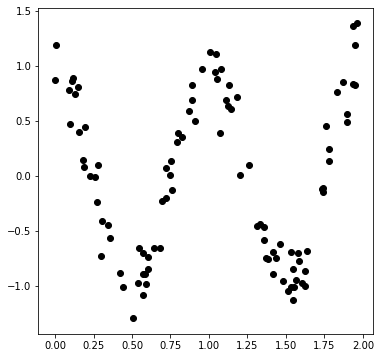

In [7]:
plt.figure(figsize=(6,6));
plt.scatter(X, y,  color='black')
plt.show()

Do walidacji modeli zastosujemy k-krotną walidację krzyżową (k-fold cross-validation)

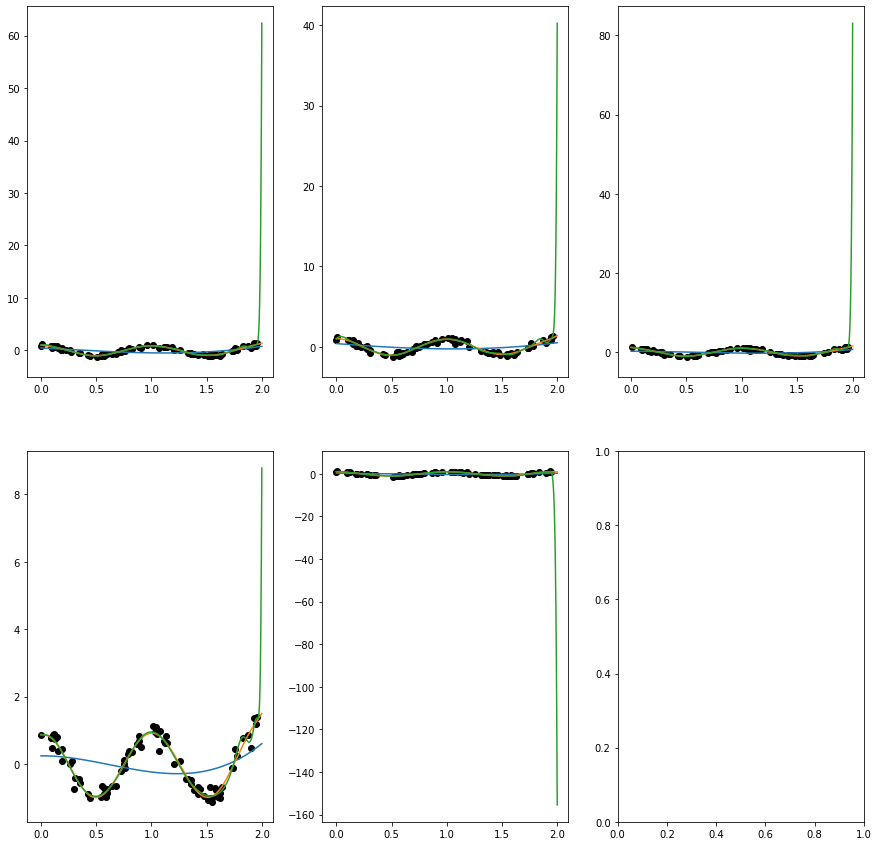

Train MSE
2.4174636915094254
0.15031128664574675
0.12242366386914852
Test MSE
2.6613006173766722
0.21697219193084052
1.064393534764503


In [8]:
kf = KFold(n_splits=5,shuffle=True,random_state=10)
MSE1_train = 0
MSE2_train = 0
MSE3_train = 0
MSE1_test = 0
MSE2_test = 0
MSE3_test = 0
fig, ax = plt.subplots(2,3,figsize=(15,15))
k = 0
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    mdl1 = make_pipeline(PolynomialFeatures(3), LinearRegression())
    mdl1.fit(X_train, y_train)
    mdl2 = make_pipeline(PolynomialFeatures(8), LinearRegression())
    mdl2.fit(X_train, y_train)
    mdl3 = make_pipeline(PolynomialFeatures(35), LinearRegression())
    mdl3.fit(X_train, y_train)
    
    MSE1_train += metrics.mean_squared_error(y_true = y_train, y_pred= mdl1.predict(X_train))
    MSE2_train += metrics.mean_squared_error(y_true = y_train, y_pred= mdl2.predict(X_train))
    MSE3_train += metrics.mean_squared_error(y_true = y_train, y_pred= mdl3.predict(X_train))
    MSE1_test += metrics.mean_squared_error(y_true = y_test, y_pred= mdl1.predict(X_test))
    MSE2_test += metrics.mean_squared_error(y_true = y_test, y_pred= mdl2.predict(X_test))
    MSE3_test += metrics.mean_squared_error(y_true = y_test, y_pred= mdl3.predict(X_test))
    
    if k<3:
        ax[0][k].plot(np.linspace(0,2,500), mdl1.predict(np.vstack(np.linspace(0,2,500))))
        ax[0][k].plot(np.linspace(0,2,500), mdl2.predict(np.vstack(np.linspace(0,2,500))))
        ax[0][k].plot(np.linspace(0,2,500), mdl3.predict(np.vstack(np.linspace(0,2,500))))
        ax[0][k].scatter(X_train,y_train,color='black')
    else:
        ax[1][k-3].plot(np.linspace(0,2,500), mdl1.predict(np.vstack(np.linspace(0,2,500))))
        ax[1][k-3].plot(np.linspace(0,2,500), mdl2.predict(np.vstack(np.linspace(0,2,500))))
        ax[1][k-3].plot(np.linspace(0,2,500), mdl3.predict(np.vstack(np.linspace(0,2,500))))
        ax[1][k-3].scatter(X_train,y_train,color='black')
    k+=1
plt.show()
print('Train MSE')
print(MSE1_train)
print(MSE2_train)
print(MSE3_train)
print('Test MSE')
print(MSE1_test)
print(MSE2_test)
print(MSE3_test)
